# Coursework 1

This notebook is intended to be used as a starting point for your experiments. The instructions can be found in the MLP2024_25_CW1_Spec.pdf (see Learn,  Assignment Submission, Coursework 1). The methods provided here are just helper functions. If you want more complex graphs such as side by side comparisons of different experiments you should learn more about matplotlib and implement them. Before each experiment remember to re-initialize neural network weights and reset the data providers so you get a properly initialized experiment. For each experiment try to keep most hyperparameters the same except the one under investigation so you can understand what the effects of each are.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, plot=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for num_epochs epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)


    '''
    if plot:
        # Plot the change in the validation and training set error over training.
        fig_1 = plt.figure(figsize=(8, 4))
        ax_1 = fig_1.add_subplot(111)
        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=k)
        ax_1.legend(loc=0)
        ax_1.set_xlabel('Epoch number')
        ax_1.set_ylabel('Error')
    
        # Plot the change in the validation and training set accuracy over training.
        fig_2 = plt.figure(figsize=(8, 4))
        ax_2 = fig_2.add_subplot(111)
        for k in ['acc(train)', 'acc(valid)']:
            ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=k)
        ax_2.legend(loc=0)
        ax_2.set_xlabel('Epoch number')
        ax_2.set_xlabel('Accuracy')
     '''
    
    return stats, keys, run_time #fig_1, ax_1, fig_2, ax_2

In [22]:
def plot_err(models_stats, models_keys, stats_interval, labels):
    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    i = 0
    for stats in models_stats:
        keys = models_keys[i]
        for k in ['error(train)', 'error(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=labels[i] + k[5:])
        i += 1
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Error')
            
def plot_acc(models_stats, models_keys, stats_interval, labels):
    # Plot the change in the validation and training set accuracy over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    i = 0
    for stats in models_stats:
        keys = models_keys[i]
        for k in ['acc(train)', 'acc(valid)']:
            ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                      stats[1:, keys[k]], label=labels[i] + k[3:])
        i += 1
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')
    ax_1.set_ylabel('Accuracy')
    
    
'''
def plot_acc(stats):
    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    ax_2.set_xlabel('Accuracy')
'''
    


"\ndef plot_acc(stats):\n    # Plot the change in the validation and training set accuracy over training.\n    fig_2 = plt.figure(figsize=(8, 4))\n    ax_2 = fig_2.add_subplot(111)\n    for k in ['acc(train)', 'acc(valid)']:\n        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, \n                  stats[1:, keys[k]], label=k)\n    ax_2.legend(loc=0)\n    ax_2.set_xlabel('Epoch number')\n    ax_2.set_xlabel('Accuracy')\n"

In [23]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
import sys
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102019 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(NpzFile '/Users/lukasjurcaga/PycharmProjects/mlpractical/data/emnist-train.npz' with keys: inputs, targets)
KeysView(NpzFile '/Users/lukasjurcaga/PycharmProjects/mlpractical/data/emnist-valid.npz' with keys: inputs, targets)


### Setting Up Params

In [24]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

%pip install tqdm

from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, DropoutLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser
from mlp.penalties import L1Penalty, L2Penalty

# Setup hyperparameters
learning_rate = 0.001
num_epochs = 100
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 128

weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Example Set - 1 Hidden Layer

In [ ]:
# Create model with ONE hidden layer
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

input_dim, output_dim, hidden_dim = 784, 47, 32

model2 = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

# Remember to use notebook=False when you write a script to be run in a terminal
m1_stats, m1_keys, time = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

m2_stats, m2_keys, time2 = train_model_and_plot_stats(
    model2, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

plot_err([m1_stats, m2_stats], [m1_keys, m2_keys], stats_interval, ['width 128', 'width 32'])
plot_acc([m1_stats, m2_stats], [m1_keys, m2_keys], stats_interval, ['width 128', 'width 32'])

### Example Set - 2 Hidden Layers

In [ ]:
# Create model with TWO hidden layers
model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # first hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # second hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Remember to use notebook=False when you write a script to be run in a terminal
_ = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)

### Experimental Set - 1 Hidden Layers & Different Layer Widths

In [ ]:
# Setup hyperparameters
hidden_dims = [32, 64, 128]
num_epochs = 100
models = {"stats": [], "keys": [], "times": []}

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Create models with ONE hidden layers and various hidden widths
for h_dim in hidden_dims:
    model = MultipleLayerModel([
        AffineLayer(input_dim, h_dim, weights_init, biases_init), # first hidden layer
        ReluLayer(),
        AffineLayer(h_dim, output_dim, weights_init, biases_init) # output layer
    ])
    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, time = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    models['stats'].append(stats)
    models['keys'].append(keys)
    models['times'].append(time)

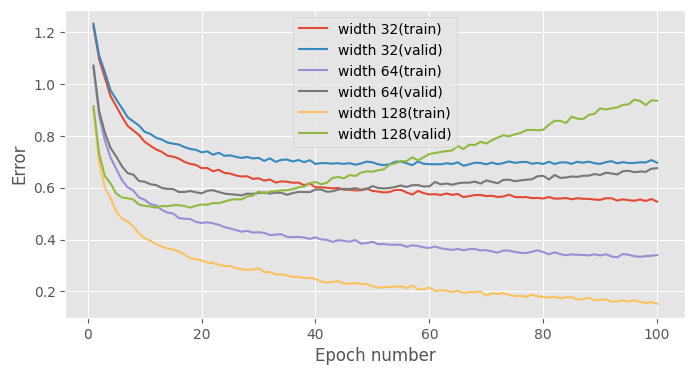

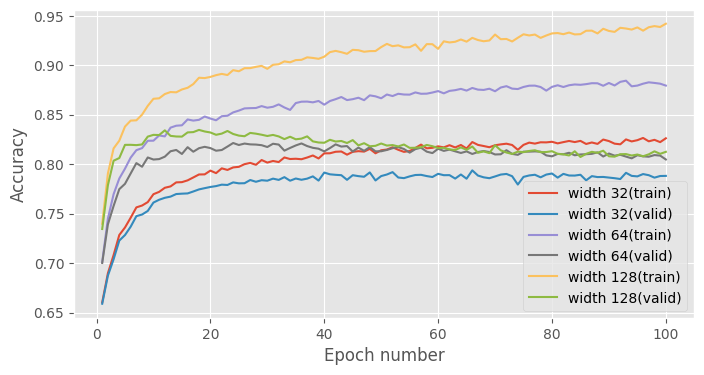

In [23]:
# Plot all models' performance
plot_err(models["stats"], models["keys"], stats_interval, ['width 32', 'width 64', 'width 128'])
plot_acc(models["stats"], models["keys"], stats_interval, ['width 32', 'width 64', 'width 128'])

In [28]:
# Output final stats
keys = models["keys"][0]
model_w32_stats = models["stats"][0]
model_w64_stats = models["stats"][1]
model_w128_stats = models["stats"][2]
print("32 Width - Val Acc: " + str(model_w32_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_w32_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_w32_stats[-1, keys['error(valid)']]))

print("64 Width - Val Acc: " + str(model_w64_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_w64_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_w64_stats[-1, keys['error(valid)']]))

print("128 Width - Val Acc: " + str(model_w128_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_w128_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_w128_stats[-1, keys['error(valid)']]))


32 Width - Val Acc: 0.7881645569620254, Train Err: 0.5464621686906217, Val Err: 0.6964715715471317
64 Width - Val Acc: 0.8047468354430377, Train Err: 0.33963979663547283, Val Err: 0.6755326520931763
128 Width - Val Acc: 0.8124683544303795, Train Err: 0.15210872327991123, Val Err: 0.9357506474815598


### Experimental Set 2 - Varying Number of Hidden Layer

In [ ]:
# Setup hyperparameters
num_hidden_layers = 3
hidden_dim = 128
num_epochs = 100
models = {"stats": [], "keys": [], "times": [], "models": []}

error = CrossEntropySoftmaxError()
# Use a Adam learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

for i in range(num_hidden_layers):
    hidden_layers = []
    for j in range(i + 1):
        if j == 0:
            hidden_layers.append(AffineLayer(input_dim, hidden_dim, weights_init, biases_init))
        else:
            hidden_layers.append(AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init))
        hidden_layers.append(ReluLayer())
    model = MultipleLayerModel(hidden_layers + [
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
    ])
    # Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, time = train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)
    models['stats'].append(stats)
    models['keys'].append(keys)
    models['times'].append(time)
    models["models"].append(model)
    

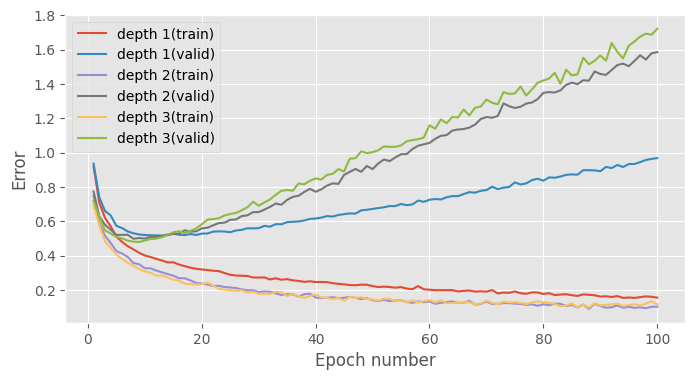

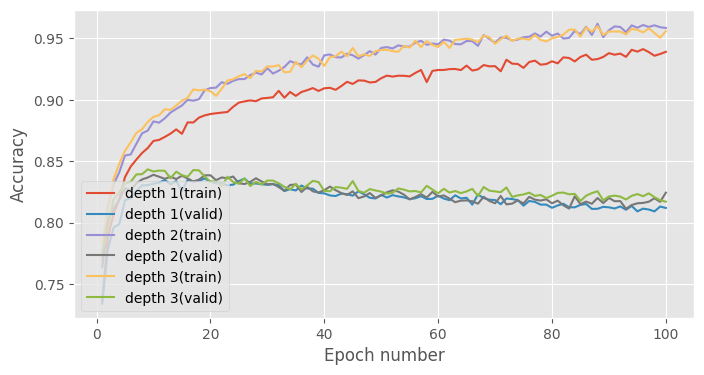

In [43]:
# Plot models' performance
plot_err(models["stats"], models["keys"], stats_interval, ['depth 1', 'depth 2', 'depth 3'])
plot_acc(models["stats"], models["keys"], stats_interval, ['depth 1', 'depth 2', 'depth 3'])    

In [44]:
# Output final stats
keys = models["keys"][0]
model_d1_stats = models["stats"][0]
model_d2_stats = models["stats"][1]
model_d3_stats = models["stats"][2]
print("1 Depth - Val Acc: " + str(model_d1_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_d1_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_d1_stats[-1, keys['error(valid)']]))

print("2 Depth - Val Acc: " + str(model_d2_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_d2_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_d2_stats[-1, keys['error(valid)']]))

print("3 Depth - Val Acc: " + str(model_d3_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(model_d3_stats[-1, keys['error(train)']]) + ", Val Err: " + str(model_d3_stats[-1, keys['error(valid)']]))

1 Depth - Val Acc: 0.8118987341772154, Train Err: 0.15583914663315582, Val Err: 0.9680014268834102
2 Depth - Val Acc: 0.8243670886075942, Train Err: 0.10339416928886955, Val Err: 1.5851230480209613
3 Depth - Val Acc: 0.8170253164556961, Train Err: 0.11725156737652893, Val Err: 1.7212737337927655


### Experiment Set 3 - Dropout Layer

In [ ]:
hidden_dim = 128
inc_prob = 0.7 

# Create model with three hidden layers using the dropout regularization
drop_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    DropoutLayer(incl_prob=0.7, rng=rng),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    DropoutLayer(incl_prob=0.7,rng=rng),
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    DropoutLayer(incl_prob=0.7,rng=rng),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])


drop_stats, drop_keys, drop_time = train_model_and_plot_stats(
        drop_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


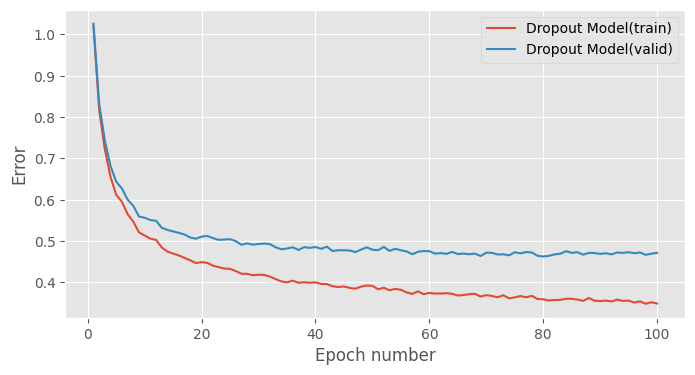

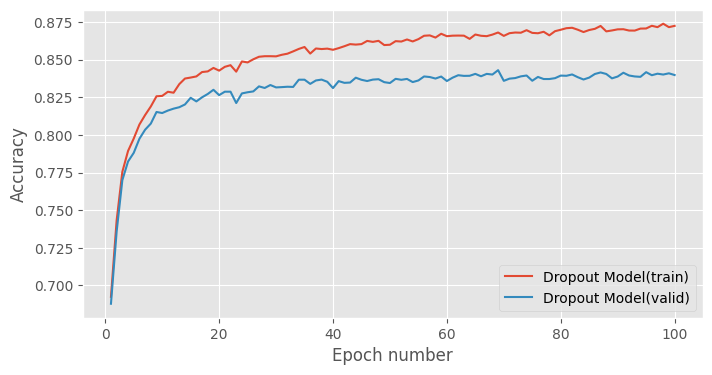

In [18]:
plot_err(models_stats=[drop_stats], models_keys=[drop_keys], stats_interval=stats_interval, labels=['Dropout Model'])
plot_acc(models_stats=[drop_stats], models_keys=[drop_keys], stats_interval=stats_interval, labels=['Dropout Model'])

In [19]:
print("Dropout Model - Val Acc: " + str(drop_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(drop_stats[-1, drop_keys['error(train)']]) + ", Val Err: " + str(drop_stats[-1, drop_keys['error(valid)']]))

Dropout Model - Val Acc: 0.8398101265822786, Train Err: 0.3489085297359504, Val Err: 0.47164309565804735


# Experiment 4 - L1 & L2 Regularisation

In [ ]:
hidden_dim = 128
l1_pen = L1Penalty(coefficient=1e-3)

# Create model with three hidden layers using the L1 regularization
l1_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty=l1_pen, biases_penalty=l1_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=l1_pen, biases_penalty=l1_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=l1_pen, biases_penalty=l1_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=l1_pen, biases_penalty=l1_pen) # output layer
])


l1_stats, l1_keys, l1_time = train_model_and_plot_stats(
        l1_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


In [28]:
print("L1 Model - Val Acc: " + str(l1_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(l1_stats[-1, drop_keys['error(train)']]) + ", Val Err: " + str(l1_stats[-1, drop_keys['error(valid)']]))

L1 Model - Val Acc: 0.7650632911392403, Train Err: 0.7511788143541296, Val Err: 0.7715406517264659


In [ ]:
hidden_dim = 128
l2_pen = L2Penalty(coefficient=1e-3)

# Create model with three hidden layers using the L1 regularization
l2_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty=l2_pen, biases_penalty=l2_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=l2_pen, biases_penalty=l2_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=l2_pen, biases_penalty=l2_pen), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=l2_pen, biases_penalty=l2_pen) # output layer
])


l2_stats, l2_keys, l2_time = train_model_and_plot_stats(
        l2_model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True)


In [33]:
print("L2 Model - Val Acc: " + str(l2_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(l2_stats[-1, drop_keys['error(train)']]) + ", Val Err: " + str(l2_stats[-1, drop_keys['error(valid)']]))

L2 Model - Val Acc: 0.8510759493670884, Train Err: 0.36313115382613953, Val Err: 0.43112893861180857


### Experiment 5 - Label Smoothing

In [ ]:
hidden_dim = 128
# Create data provider objects for the MNIST data set with label smoothing
smoothed_train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng, smooth_labels=True)
# smoothed_valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng, smooth_labels=True)

# Create model with three hidden layers using the L1 regularization
base_model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), # hidden layer
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init) # output layer
])


smoothed_stats, smoothed_keys, smoothed_time = train_model_and_plot_stats(
        base_model, error, learning_rule, smoothed_train_data, valid_data, num_epochs, stats_interval, notebook=True)

In [35]:
print("Model with Label Smoothing - Val Acc: " + str(smoothed_stats[-1, keys['acc(valid)']])  + ", Train Err: " + str(smoothed_stats[-1, drop_keys['error(train)']]) + ", Val Err: " + str(smoothed_stats[-1, drop_keys['error(valid)']]))

Model with Label Smoothing - Val Acc: 0.8348734177215185, Train Err: 0.8393400957031969, Val Err: 0.6541921245420633


### Regularization Results

In [42]:
dropout_hyperparams = [0.6, 0.7, 0.85, 0.97]
dropout_validation_accuracy = [80.7, 83.9, 85.1, 85.4]
dropout_generalization_gap = [0.593 - 0.549, 0.474 - 0.352, 0.434 - 0.329, 0.457 - 0.244]

# L1 penalty model data
l1_penalty_hyperparams = [5e-4, 1e-3, 5e-3, 5e-2]
l1_penalty_validation_accuracy = [79.5, 76.5, 2.41, 2.20]
l1_penalty_generalization_gap = [0.658 - 0.642, 0.772 - 0.751, 3.850 - 3.850, 3.850 - 3.850]

# L2 penalty model data
l2_penalty_hyperparams = [5e-4, 1e-3, 5e-3, 5e-2]
l2_penalty_validation_accuracy = [85.1, 85.1, 81.3, 39.2]
l2_penalty_generalization_gap = [0.460 - 0.306, 0.431 - 0.363, 0.607 - 0.586, 2.256 - 2.258]

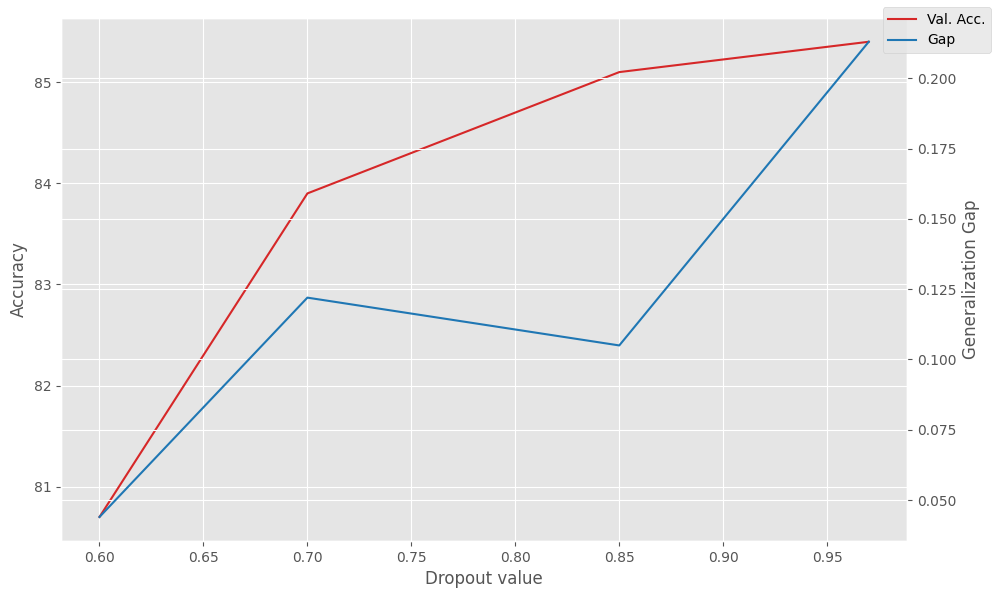

In [43]:
# Create a figure and a primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Validation Accuracy on the primary y-axis
ax1.set_xlabel('Dropout value')  # X-axis label (hyperparameter values)
ax1.set_ylabel('Accuracy')  # Left y-axis label
ax1.plot(dropout_hyperparams, dropout_validation_accuracy, label="Val. Acc.", color='tab:red')
ax1.tick_params(axis='y')  # Color the ticks on the left y-axis

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Generalization Gap')  # Right y-axis label
ax2.plot(dropout_hyperparams, dropout_generalization_gap, label="Gap", color='tab:blue')
ax2.tick_params(axis='y')  # Color the ticks on the right y-axis

# Title and layout
fig.legend()
fig.tight_layout()  # To ensure proper layout

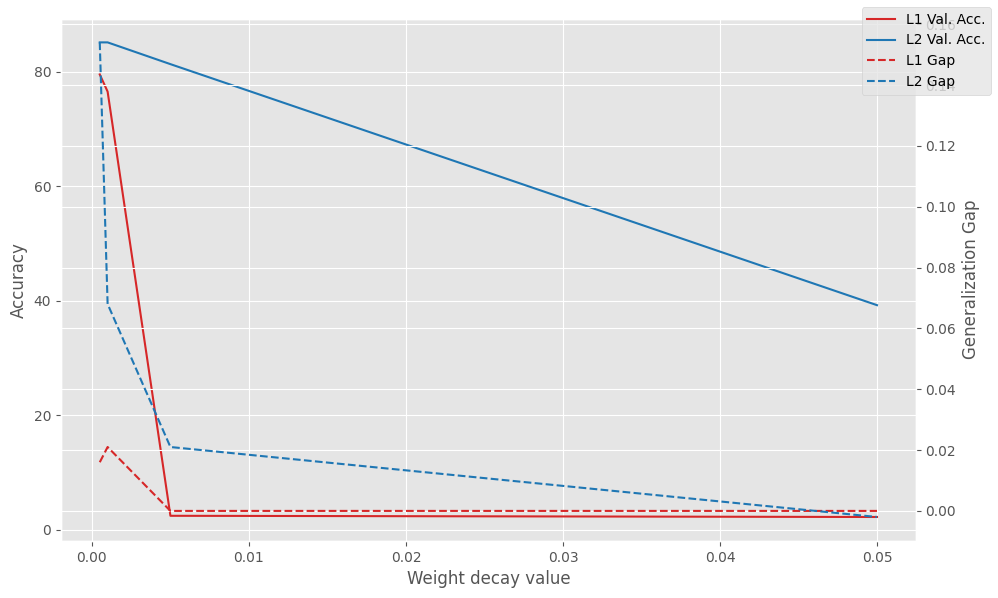

In [45]:
# Create a figure and a primary axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Validation Accuracy on the primary y-axis
ax1.set_xlabel('Weight decay value')  # X-axis label (hyperparameter values)
ax1.set_ylabel('Accuracy')  # Left y-axis label
ax1.plot(l1_penalty_hyperparams, l1_penalty_validation_accuracy, label="L1 Val. Acc.", color='tab:red')
ax1.plot(l2_penalty_hyperparams, l2_penalty_validation_accuracy, label="L2 Val. Acc.", color='tab:blue')
ax1.tick_params(axis='y')  # Color the ticks on the left y-axis

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()  
ax2.set_ylabel('Generalization Gap')  # Right y-axis label
ax2.plot(l1_penalty_hyperparams, l1_penalty_generalization_gap, label="L1 Gap", color='tab:red', linestyle='--')
ax2.plot(l2_penalty_hyperparams, l2_penalty_generalization_gap, label="L2 Gap", color='tab:blue', linestyle='--')
ax2.tick_params(axis='y')  # Color the ticks on the right y-axis

# Title and layout
fig.legend()
fig.tight_layout()  # To ensure proper layout

In [46]:
l2_penalty_generalization_gap

[0.15400000000000003, 0.068, 0.02100000000000002, -0.002000000000000224]

In [48]:
l2_penalty_validation_accuracy

[85.1, 85.1, 81.3, 39.2]

In [47]:
dropout_generalization_gap

[0.04399999999999993, 0.122, 0.10499999999999998, 0.21300000000000002]

### Testing Best Model

In [57]:
test_data = EMNISTDataProvider('test', batch_size=batch_size, rng=rng)
acc = lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()
test_data.num_batches

KeysView(NpzFile '/Users/lukasjurcaga/PycharmProjects/mlpractical/data/emnist-test.npz' with keys: inputs, targets)


158

In [69]:
batch_acc = []
batch_err = []
for inputs_batch, targets_batch in test_data:
    outputs_batch = l2_model.fprop(inputs_batch, evaluation=True)[-1]
    batch_acc.append(acc(outputs_batch, targets_batch))
    batch_err.append(error(outputs_batch, targets_batch))

print(np.mean(batch_acc))
print(np.mean(batch_err))
    

0.8427848101265821
0.45781017786553
